# Amazing RL Agent

In [2]:
import gymnasium as gym
import torch
import numpy as np
import importlib

# Render screen, set to false if training
RENDER_AGENT = True


In [20]:
# Test pytorch is working

x = torch.rand(size=(1000,))
x = x + 1

# If you have a nvidia gpu with torch installed correctly
# you can move the tensors to the gpu for some extra
# speed, not necessary although.
DEVICE = "cuda:0" if torch.cuda.is_available() else "cpu"
print(f"Using {DEVICE}")
# When creating a new tensor make sure you move it to a
# device using .to(DEVICE), such as:
x = x.to(DEVICE)
# The tensor in x has been moved to the device


Using cpu


In [86]:
# Import agent
import agents

# Reload module as jupyter notebooks wont update to any changes youve made
importlib.reload(
    agents
)
#agent = agents.Agent()

# 24 + 4 as the controller state is included
agent = agents.DDPG(24, 4)

In [87]:
env = gym.make("BipedalWalker-v3", hardcore=False) # , render_mode="human"
observation, info = env.reset(seed=27)
steps_per_episode = 200 # T
for episode in range(1000): # M

    action = [0, 0, 0, 0]
    rewards = 0
    step = 0
    while(step < steps_per_episode):
        action = agent.choose_action(
            env.action_space, observation 
        )  # this is where you would insert your policy
        observation, reward, terminated, truncated, info = env.step(action)
        rewards += reward
        
        agent.update(observation, reward, terminated, truncated)
        if terminated or truncated:
            observation, info = env.reset()
            action = [0, 0, 0, 0]
        step += 1
        #env.render()
    print(episode, rewards)
    observation, info = env.reset()
    #control.reset()
env.close()


/opt/homebrew/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:275: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'torch.Tensor'>
  logger.warn(


0 tensor(-120.6171, dtype=torch.float64)
1 tensor(-340.8728, dtype=torch.float64)
2 tensor(-359.4795, dtype=torch.float64)
3 tensor(-225.9679, dtype=torch.float64)
4 tensor(-119.6154, dtype=torch.float64)
5 tensor(-361.1171, dtype=torch.float64)
6 tensor(-237.0829, dtype=torch.float64)


KeyboardInterrupt: 

In [20]:
# Import agent
import agents

# Reload module as jupyter notebooks wont update to any changes youve made
importlib.reload(
    agents
)
#agent = agents.Agent()

# 24 + 4 as the controller state is included
agent = agents.DDPG(2, 1)
scores = []

In [21]:

env = gym.make('MountainCarContinuous-v0') # , render_mode="human"
#env = gym.make('CartPole-v1') # 
observation, info = env.reset(seed=27)
steps_per_episode = 999 # T
for episode in range(10000): # M
    action = [0]
    rewards = 0
    step = 0
    while(step < steps_per_episode):
        action = agent.choose_action(
            env.action_space, observation 
        )  # this is where you would insert your policy
        observation, reward, terminated, truncated, info = env.step(action)
        rewards += reward
        
        #agent.update(observation, reward, terminated, truncated)
        if terminated or truncated:
            break
            observation, info = env.reset()
            action = [0]
        step += 1
        #env.render()
    print(episode, rewards)
    scores.append(rewards)
    observation, info = env.reset()
    #control.reset()
env.close()


0 -15.091521645686617
1 -15.141777481484544
2 -15.415332639254876
3 -15.249645257717964
4 -16.09747683805227
5 -15.501942253089574
6 -15.444120231214214
7 -14.709239965765406
8 -14.95882116630539
9 -14.040886075268217
10 -15.096424223207622
11 -16.03581385891918
12 -14.909065344873332
13 -15.019263460285417
14 -15.423044143204757
15 -14.914539845641723
16 -15.876788652784903
17 -14.703482050847104
18 -15.212344752628999
19 -15.66642052587114
20 -14.961047045377017
21 -15.686188173347903
22 -15.837681511116667
23 -14.60841042829083
24 -15.525688587341843
25 -15.313427703791055
26 -15.286615984688147
27 -15.93478756403147
28 -15.941474543595302
29 -14.992151212919307
30 -16.125727773602033
31 -15.353980229349794
32 -14.829517017768845
33 -15.82858825165663
34 -14.674339031010085
35 -14.878287235124771
36 -15.384167811414697
37 -14.703983887888068
38 -15.901160354157648
39 -15.559884817587925
40 -14.83126856900636
41 -15.09849288093589
42 -15.647914771984674
43 -15.17930573243327
44 -15.1

KeyboardInterrupt: 

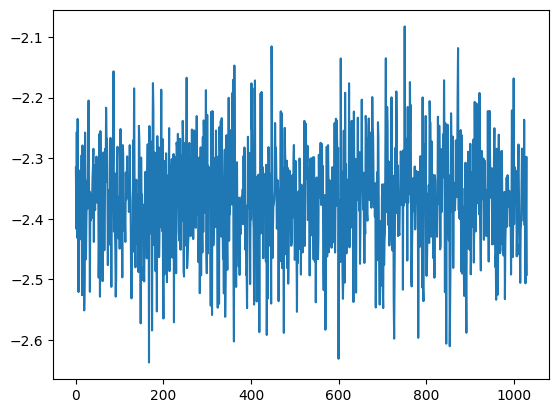

In [14]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(scores))], scores)
plt.show()